In [1]:
# Run this first!!!
from IPython.display import display, HTML

from __future__ import division
import matplotlib.pyplot as plt
from scipy.optimize import brentq

import sys
sys.path.append('..')
import util
sys.path.append('../aho_merging')
from size_model import SizeModel
sys.path.append('../common')
import common_probs
from sampler import DepthSampler

# Parameter Finding

## By Eye

Let's first see if we can choose appropriate parameters by eye so that it closely fits the curve of the simulated algorithm. Doing this can help justify the use of this model. Let's consider the case where the size of the alphabet is $a = 4$. Then the mean number of states per level converges to about 7. 

Therefore we need

$$
\frac{\mu_X}{1 - \mu_Y} \approx 7 \implies \mu_x + 7 \mu_Y \approx 7
$$

It doesn't seem unreasonable to guess that $\mu_X = 0.2$ meaning that $\mu_Y = \frac{68}{70} = 0.97...$. Let's restrict the offspring distribution $F$ so that it can have at most 2 children. 

In [12]:
def plot_trends(num_samples, length):
    alg_trend = get_alg_trend(num_samples, length)[1:]
    model_trend = get_model_trend(num_samples, length)
    depths = range(1, length + 1)
    plt.plot(depths, alg_trend, label='Algorithm')
    plt.plot(depths, model_trend, label='Model')
    plt.legend(loc='upper right')
    plt.show()

def get_alg_trend(num_samples, length):
    ds = DepthSampler([0.5 for _ in range(4)], length)
    df = ds.draw_samples(num_samples, ['number_of_states'])
    return df.groupby('depth')['number_of_states'].mean().tolist()
    
def get_model_trend(num_samples, length):
    model = SizeModel(0.2, [0.2, 0.63, 0.17])
    return model.do_sims(length, num_samples)

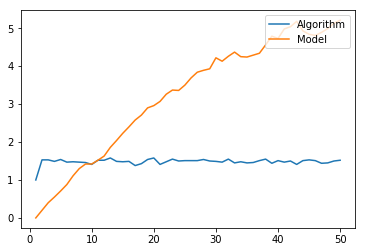

In [13]:
# Constants
NUM_SAMPLES = 100
LENGTH = 50

plot_trends(NUM_SAMPLES, LENGTH)